In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
import os
from data_utils import get_train_and_validation_directories, ROOT_DIR
from model import get_simple_model, compile_and_train

In [4]:
train_dir, validation_dir = get_train_and_validation_directories()
print(f"Training Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")

Training Directory: /home/iowomugisha/Projects/tensorflow-deeplearningai/data/cats_and_dogs_filtered/train
Validation Directory: /home/iowomugisha/Projects/tensorflow-deeplearningai/data/cats_and_dogs_filtered/validation


In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.2.jpg', 'cat.615.jpg', 'cat.424.jpg', 'cat.977.jpg', 'cat.8.jpg', 'cat.647.jpg', 'cat.159.jpg', 'cat.657.jpg', 'cat.598.jpg', 'cat.247.jpg']
['dog.779.jpg', 'dog.139.jpg', 'dog.620.jpg', 'dog.646.jpg', 'dog.486.jpg', 'dog.751.jpg', 'dog.479.jpg', 'dog.118.jpg', 'dog.95.jpg', 'dog.272.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Images will be output in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # index for iterating over images

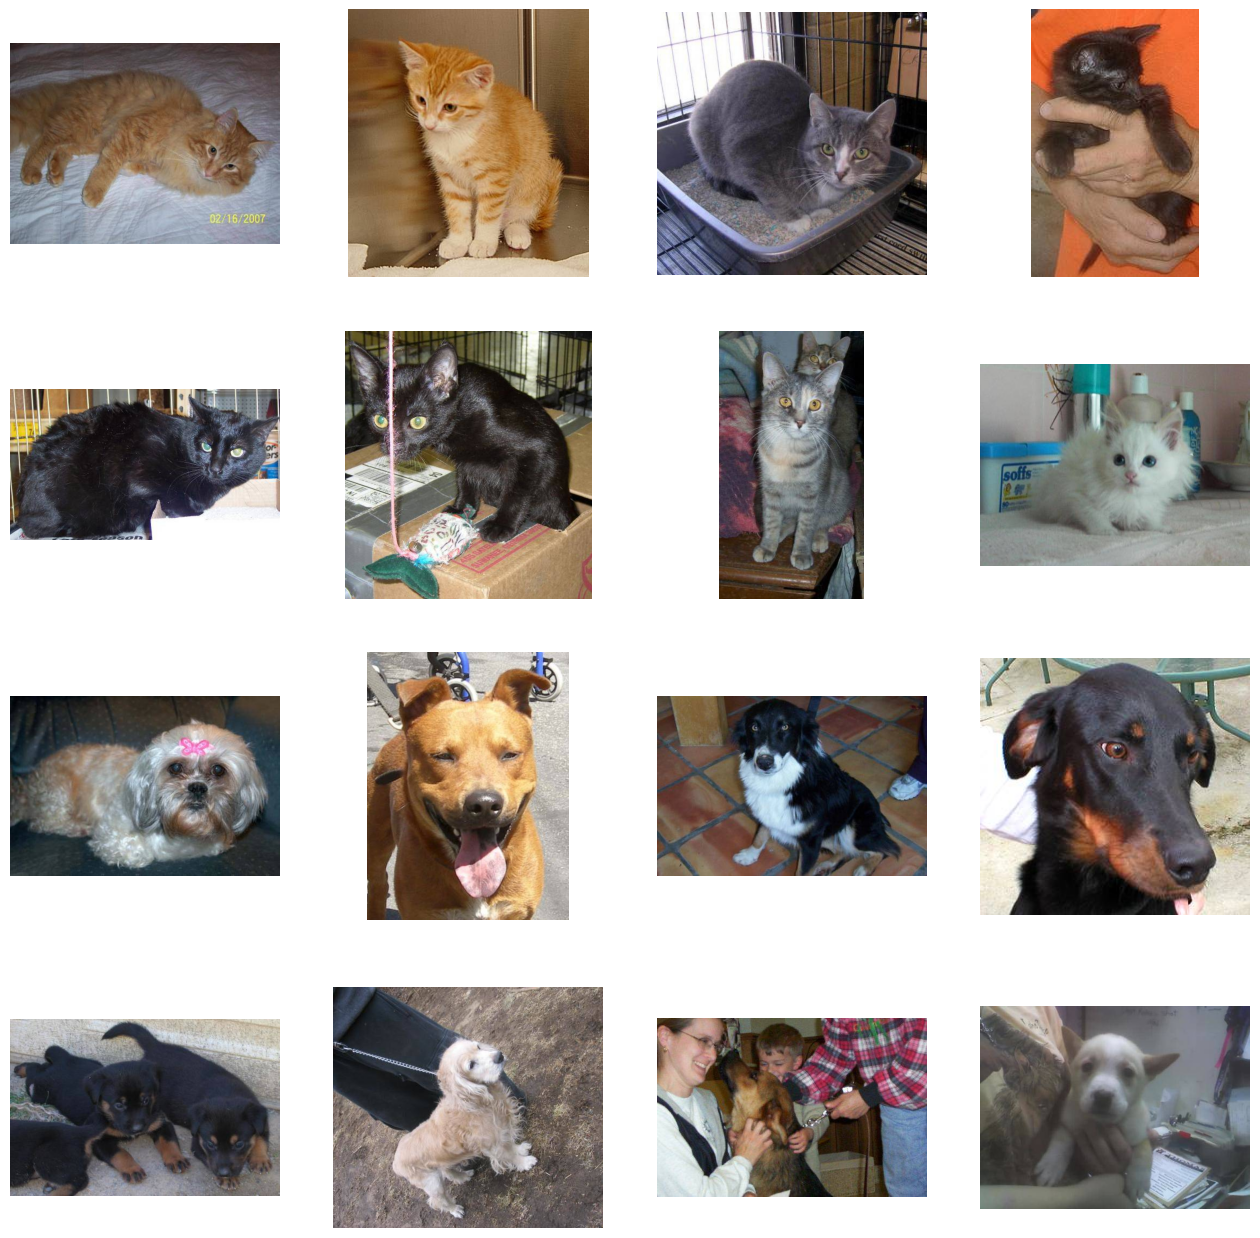

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index - 8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index - 8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)  # set up subplot; subplot indices start at 1
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Modeling

In [11]:
model = get_simple_model()
model.summary()

2022-11-15 11:28:08.858053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 11:28:08.859229: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (NVIDIA Quadro T1000)
2022-11-15 11:28:10.015879: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 1 (Intel(R) UHD Graphics 630)
2022-11-15 11:28:10.154923: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 11:28:10.154953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Y

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = compile_and_train(model, train_generator, validation_generator, 15)

Epoch 1/15


2022-11-15 11:33:37.209105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 11:33:37.322282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 11:33:37.322329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 11:33:37.322349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10153 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-11-15 11:33:37.322362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

100/100 - 11s - loss: 0.8746 - accuracy: 0.5790 - val_loss: 0.7237 - val_accuracy: 0.5230 - 11s/epoch - 105ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6485 - accuracy: 0.6550 - val_loss: 0.6042 - val_accuracy: 0.6760 - 4s/epoch - 43ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5736 - accuracy: 0.7185 - val_loss: 0.6599 - val_accuracy: 0.6800 - 4s/epoch - 42ms/step
Epoch 4/15
100/100 - 4s - loss: 0.5114 - accuracy: 0.7520 - val_loss: 0.5928 - val_accuracy: 0.6980 - 4s/epoch - 41ms/step
Epoch 5/15
100/100 - 4s - loss: 0.4428 - accuracy: 0.7870 - val_loss: 0.6152 - val_accuracy: 0.7030 - 4s/epoch - 41ms/step
Epoch 6/15
100/100 - 4s - loss: 0.3695 - accuracy: 0.8350 - val_loss: 0.7192 - val_accuracy: 0.6920 - 4s/epoch - 41ms/step
Epoch 7/15
100/100 - 4s - loss: 0.2973 - accuracy: 0.8665 - val_loss: 0.7335 - val_accuracy: 0.7010 - 4s/epoch - 44ms/step
Epoch 8/15
100/100 - 4s - loss: 0.2118 - accuracy: 0.9070 - val_loss: 0.8716 - val_accuracy: 0.7130 - 4s/epoch - 42ms/step
Epoch 9/15
100/100 - 4s 

#### Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and validation loss')

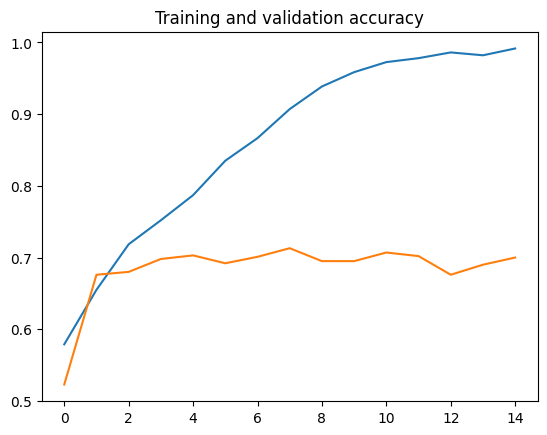

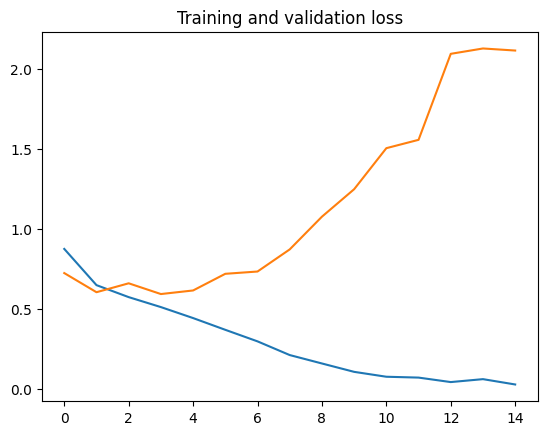

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

#### Visualizing Intermediate Representations

1/1 [==============================] - 0s 74ms/step


2022-11-15 12:11:19.669111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/tmp/ipykernel_8576/2148603579.py:40: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


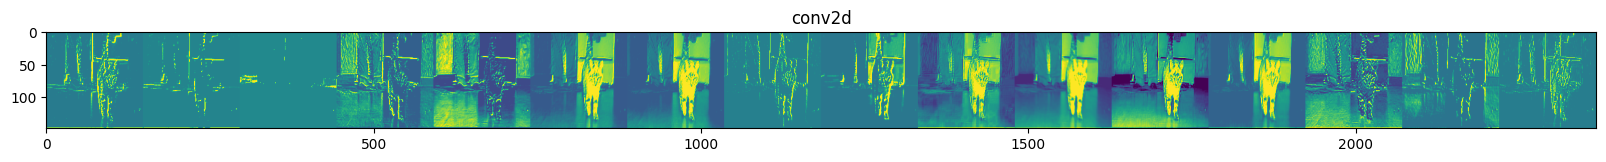

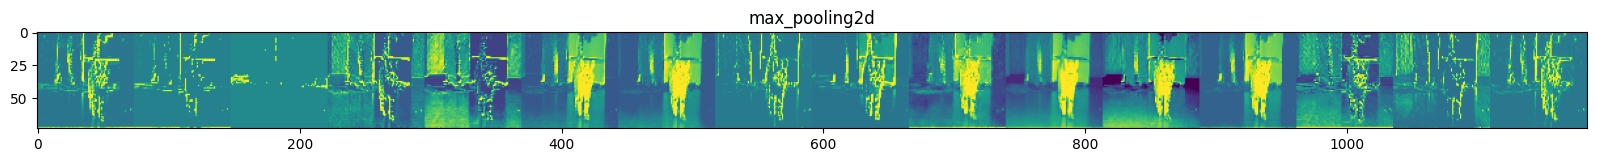

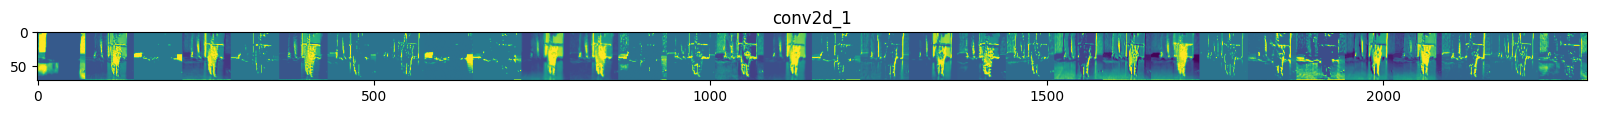

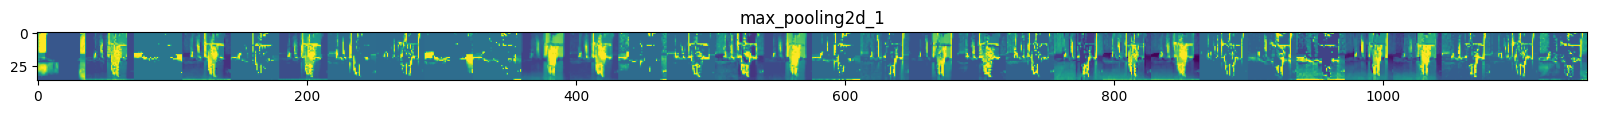

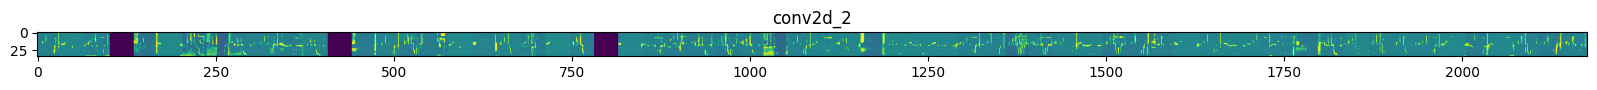

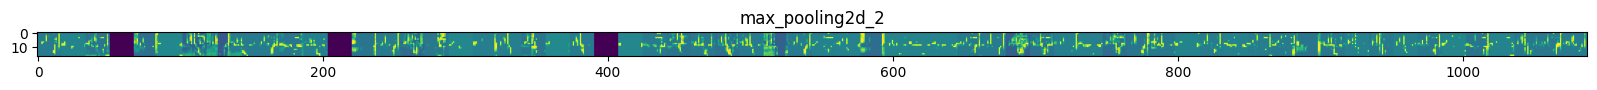

In [20]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output intermediate represenations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # PIL image
x = img_to_array(img)                             # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)                     # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# Display representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    
    if len(feature_map.shape) == 4:
        # only done for conv/maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
        
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x  # Tile each filter into a horizontal grid
        
        # Display grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')